In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Load Data**

In [2]:
!unzip 'titanic.zip'

Archive:  titanic.zip
  inflating: train.csv               
  inflating: test.csv                


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# **Exploring Train Data**

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
duplicated = train_data.duplicated().sum()
null = train_data.isnull().sum()

print(f'- There are {duplicated} duplicated values')
print(f'- Null values: \n{null}')

- There are 0 duplicated values
- Null values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
train_data.corr()

<ipython-input-9-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We can see that there is no duplicated values. However, there are 3 features which has null values:
  
  

*   Age: This feature has 177 nulls, but I think it is an important feature, so i will try to impute it
*   Cabin: This feature misses a lot of data, so i'll just drop it
*   Embarked: This feature only has 2 null values, so just drop the rows with missing values

Besides, 'SibSp' and 'Parch' can be combine into 1 feature such as 'Related'


# Preprocessing Data

In [10]:
related = []
for i in range(train_data.shape[0]):
  related.append(train_data.SibSp[i] + train_data.Parch[i])

related = pd.Series(related)
train_data = pd.concat((train_data, related.rename('Related')), axis = 1)

In [11]:
# Drop 'Cabin' feature
train_data.drop('Cabin', axis = 1, inplace = True)

# Drop 'Embarked' rows with missing values
train_data.dropna(subset = 'Embarked', axis = 0, inplace = True)

# Drop 'SibSp' and 'Parch' because they've combined into 'Related'
train_data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Related
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   Ticket       889 non-null    object 
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Related      889 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Embarked         0
Related          0
dtype: int64

In [15]:
numerical_cols = [cols for cols in train_data if train_data[cols].dtypes in ['int64', 'float64']]
categorical_cols = [cols for cols in train_data if train_data[cols].dtypes == 'object']

**Exloring categorical data**

In [16]:
for i, col in enumerate(categorical_cols):
  print(f'{col.title()}: {train_data[col].unique()}')

Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' '

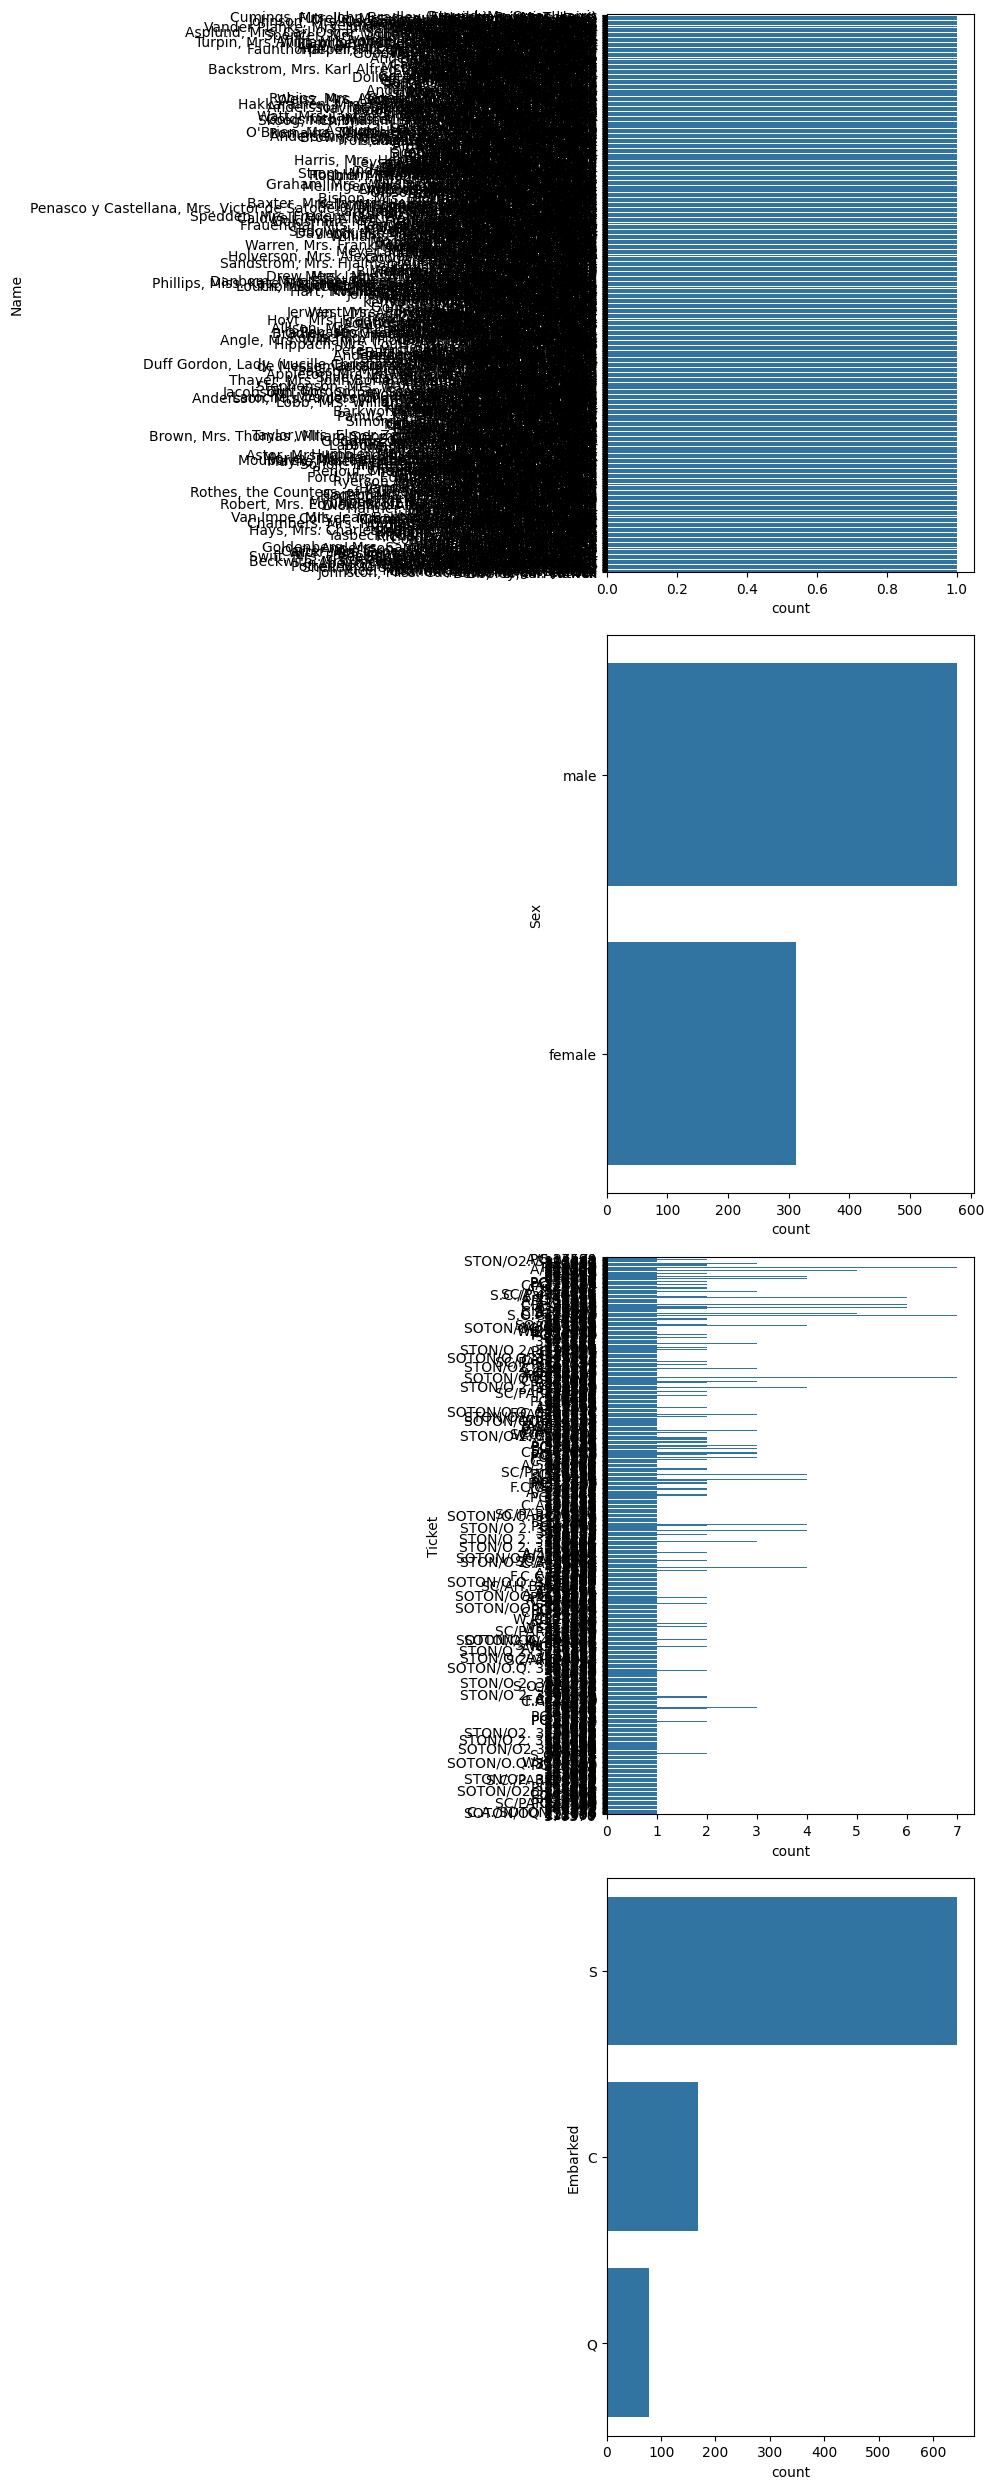

In [17]:
fig, axes = plt.subplots(figsize=(10,25), ncols=1, nrows=4)

for i, col in enumerate(categorical_cols):
  sns.countplot(data = train_data, y = col, ax = axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

*  We can see from the graphs that 'Name' and 'Ticket' contain a lot of unique values, so they may not contribute to the model very well

*  We will onehot encode 'Sex' and 'Embarked' and use them for training

**Organize data use for training**

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Related
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [19]:
# Features selected for training model
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Related']

# Separate target and predictors
y = train_data['Survived']
X = train_data[features]

# Separate categorical and numerical cols
numerical_cols = [col for col in X if X[col].dtypes in ['int64', 'float64']]
categorical_cols = [col for col in X if X[col].dtypes == 'object']

In [20]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Related
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


**Building Model**

In [21]:
# Fill na values for numerical data
imputer = SimpleImputer(strategy = 'mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Preprocessing for categorical data
OH_encoded = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)
enc = OH_encoded.fit_transform(X[categorical_cols])

# Concate numerical and catericol cols
X = np.concatenate((X[numerical_cols], enc), axis = 1)

# Normalize dat
norm = StandardScaler()
X = norm.fit_transform(X)

# Slit train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<ipython-input-21-caa6eccb2c5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = imputer.fit_transform(X[numerical_cols])


In [22]:
# Define Logistic Regression model
md = LogisticRegression(random_state=42)

# Fit model
md.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
y_pred = md.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.7752808988764045

**Preprocessing test data**

In [24]:
output = pd.DataFrame(test_data['PassengerId'])

In [25]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test_data.shape

(418, 11)

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
duplicated = test_data.duplicated().sum()
null = test_data.isnull().sum()

print(f'- There are {duplicated} duplicated values')
print(f'- Null values: \n{null}')

- There are 0 duplicated values
- Null values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
related = []
for i in range(test_data.shape[0]):
  related.append(test_data.SibSp[i] + test_data.Parch[i])

related = pd.Series(related)
test_data = pd.concat((test_data, related.rename('Related')), axis = 1)

In [30]:
# Drop 'Cabin' feature
test_data.drop('Cabin', axis = 1, inplace = True)

# Drop 'Embarked' rows with missing values
test_data.dropna(subset = 'Embarked', axis = 0, inplace = True)

# Drop 'SibSp' and 'Parch' because they've combined into 'Related'
test_data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [31]:
test_data = test_data[features]
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Related
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,2


In [32]:
# Fill na values for numerical data
imputer = SimpleImputer(strategy = 'mean')
test_data[numerical_cols] = imputer.fit_transform(test_data[numerical_cols])

# Preprocessing for categorical data
OH_encoded = OneHotEncoder(handle_unknown= 'ignore', sparse_output=False)
enc = OH_encoded.fit_transform(test_data[categorical_cols])

# Concate numerical and catericol cols
test_data = np.concatenate((test_data[numerical_cols], enc), axis = 1)

# Normalize dat
norm = StandardScaler()
test_data = norm.fit_transform(test_data)

**Build model on whole training data and generate predictions**

In [33]:
# Define model
model = LogisticRegression(random_state=42)

# Fit model on whole training set
model.fit(X, y)

# Predict
preds = model.predict(test_data)

In [34]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': output['PassengerId'],
                       'Survived': preds})
output.to_csv('submission.csv', index=False)